# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [ ]:
import pandas as pd

#df = pd.read_csv("C:\\Student Depression Dataset.csv")
df = pd.read_csv("C:\\Users\\Darya\\Desktop\\№7 Lecture support materials, lectures, seminars and labs\\Seminars\\Machine learning\\Seminar 9\\Student Depression Dataset.csv")


df = df.drop(columns=['id'])

df.head(10)

First 10 rows of the dataset:
   Gender   Age  Profession  Academic Pressure  Work Pressure  CGPA  \
0       0  33.0         0.0                5.0            0.0  8.97   
1       1  24.0         0.0                2.0            0.0  5.90   
2       0  31.0         0.0                3.0            0.0  7.03   
3       1  28.0         0.0                3.0            0.0  5.59   
4       1  25.0         0.0                4.0            0.0  8.13   
5       0  29.0         0.0                2.0            0.0  5.70   
6       0  30.0         0.0                3.0            0.0  9.54   
7       1  30.0         0.0                2.0            0.0  8.04   
8       0  28.0         0.0                3.0            0.0  9.79   
9       0  31.0         0.0                2.0            0.0  8.38   

   Study Satisfaction  Job Satisfaction  \
0                 2.0               0.0   
1                 5.0               0.0   
2                 5.0               0.0   
3               

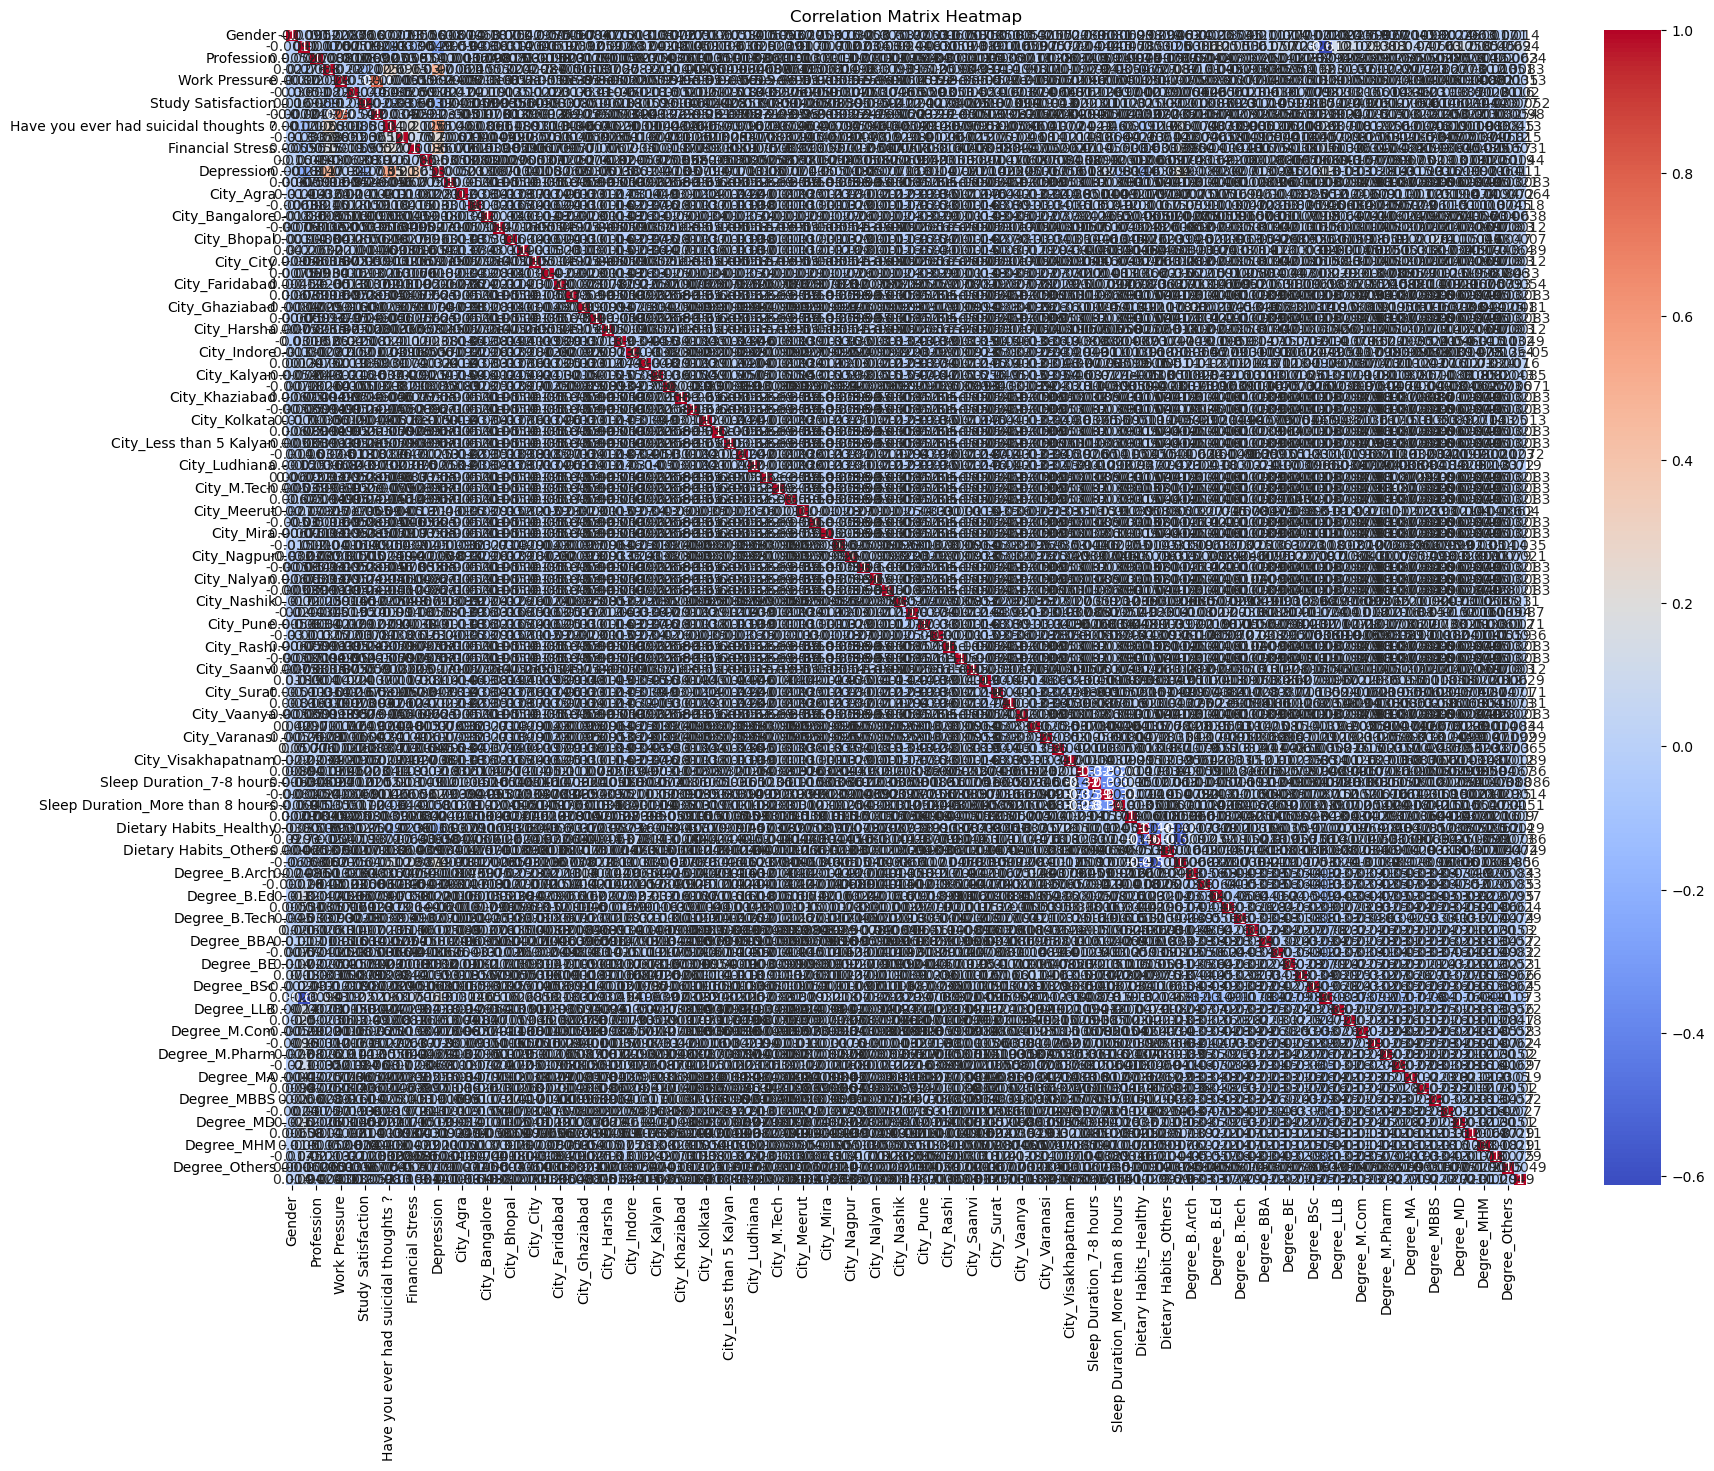

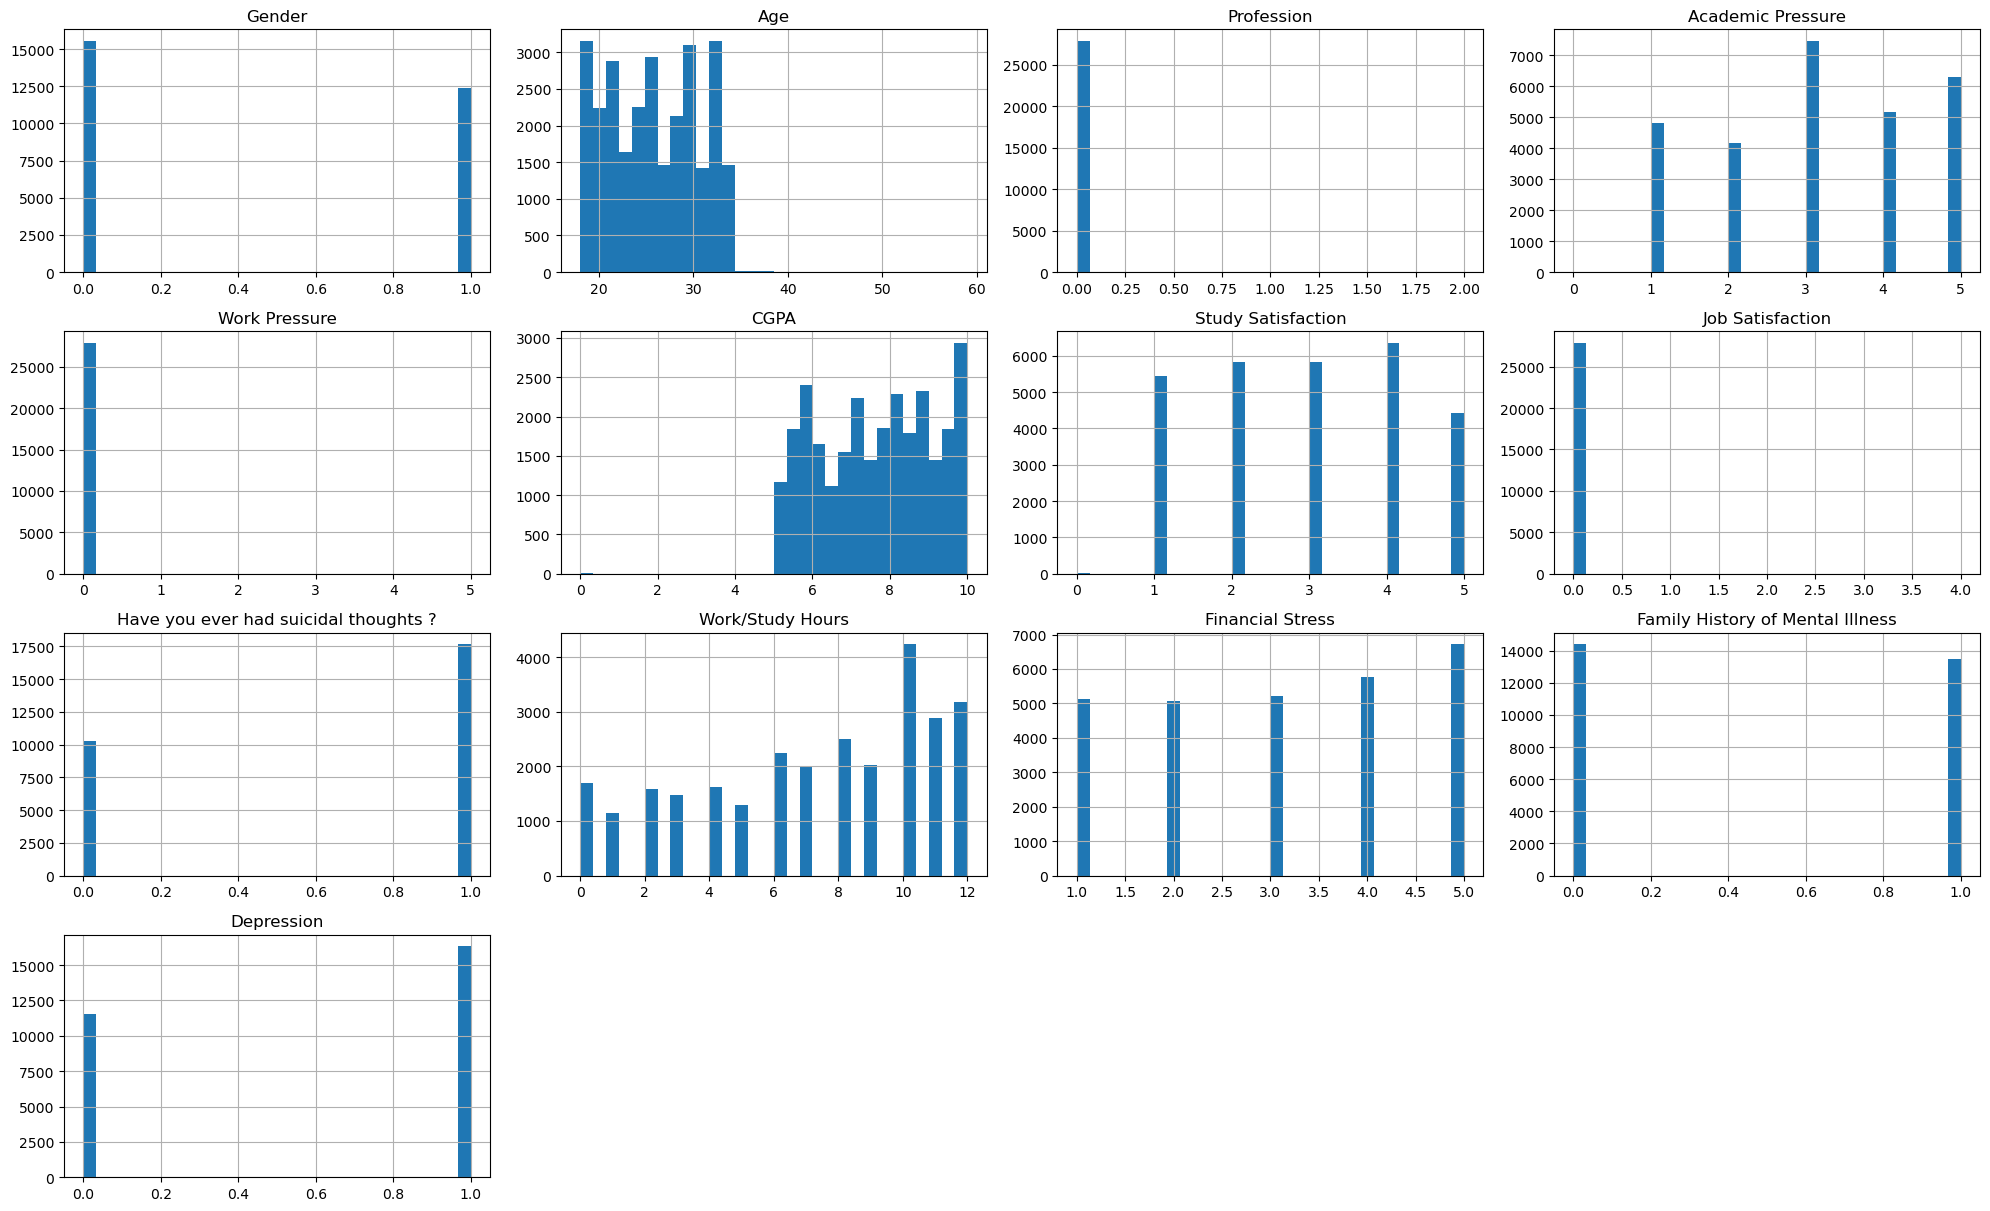

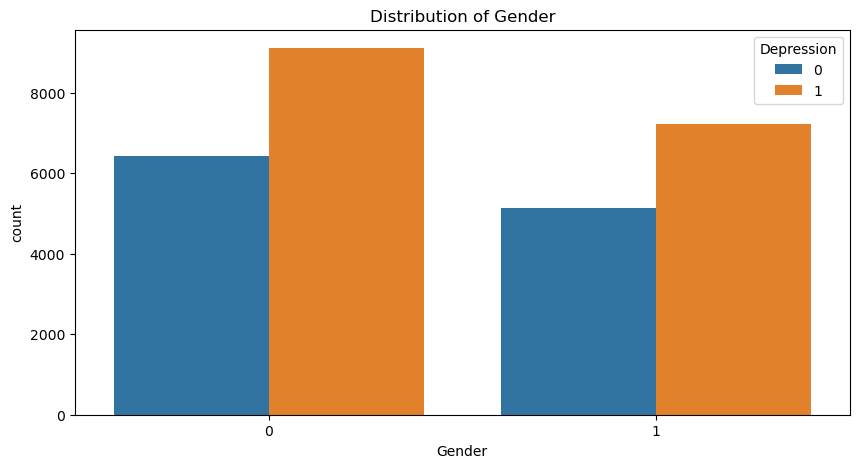

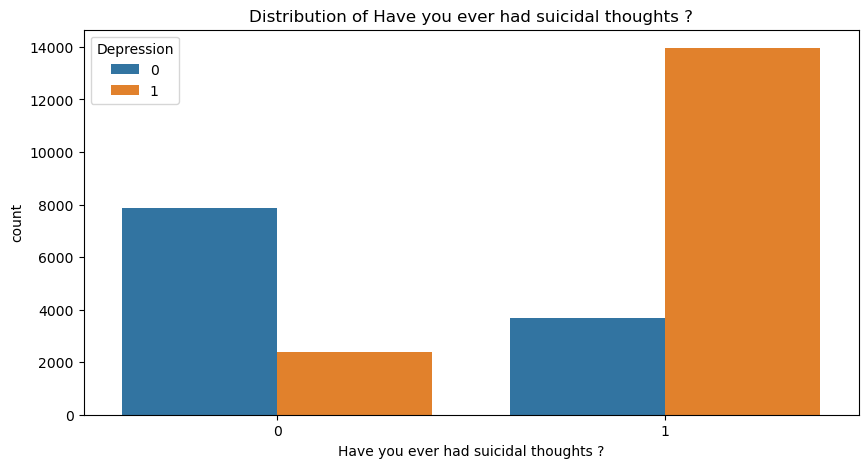

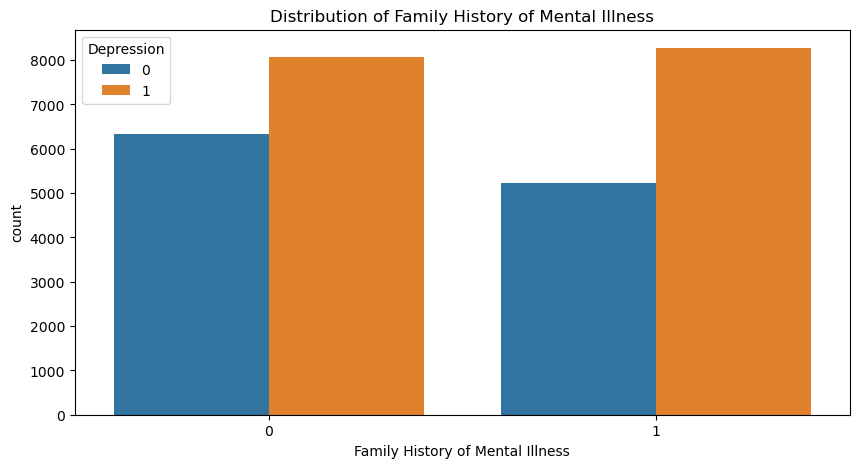

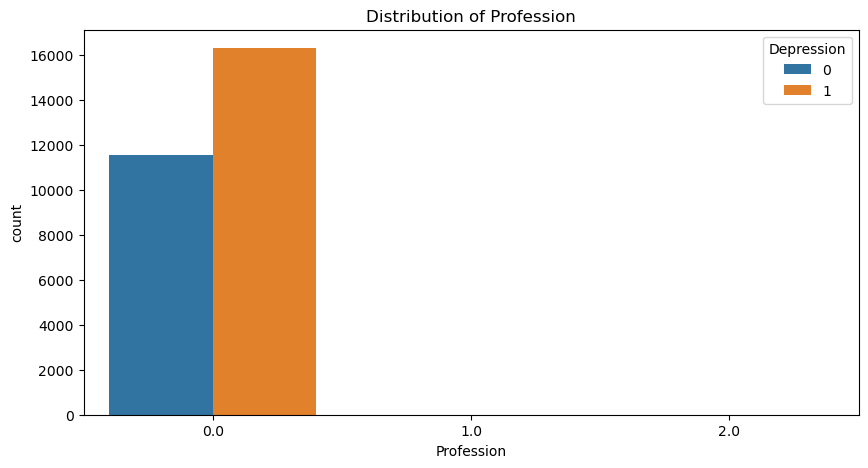

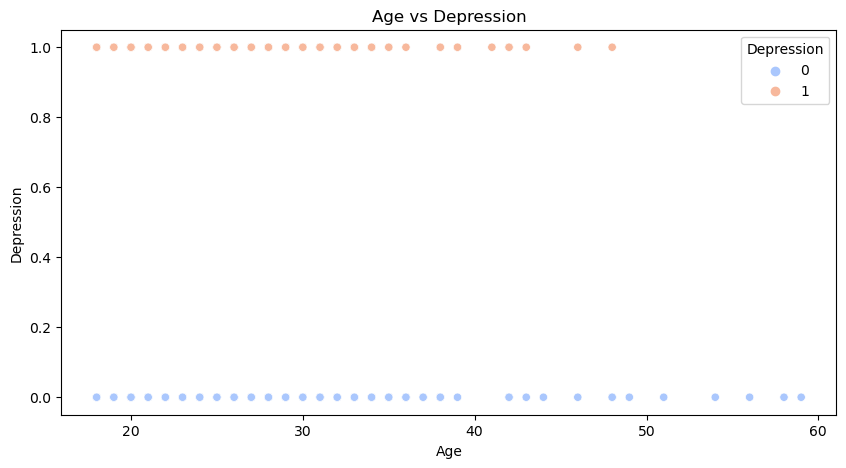

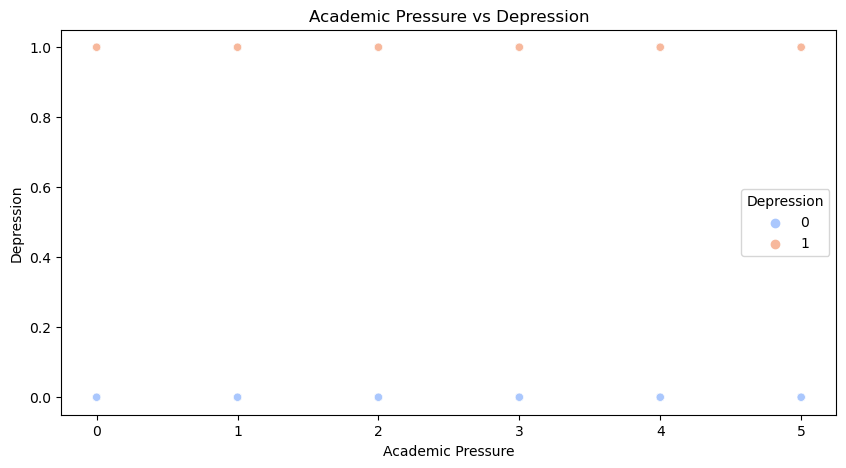

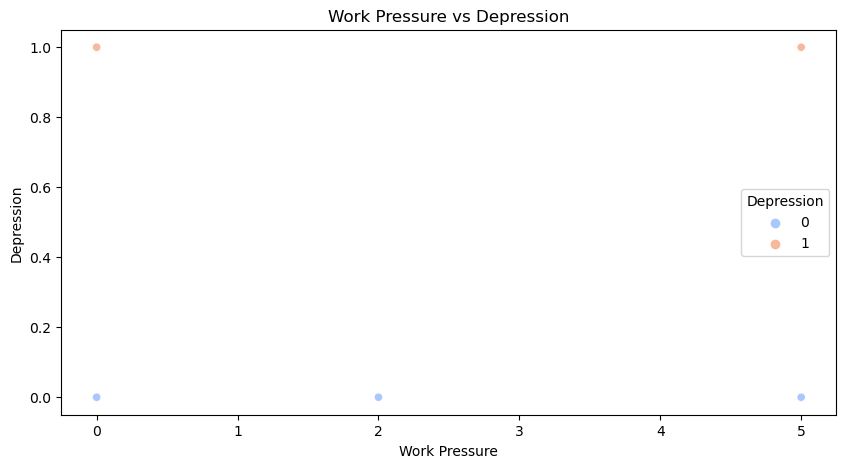

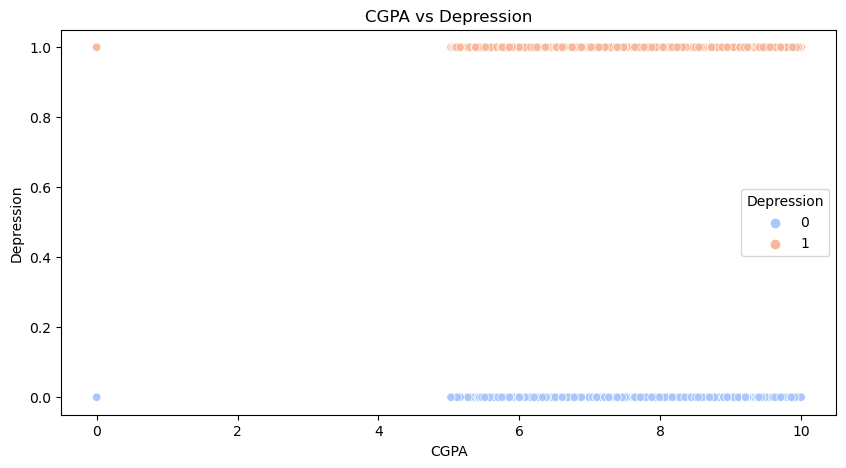

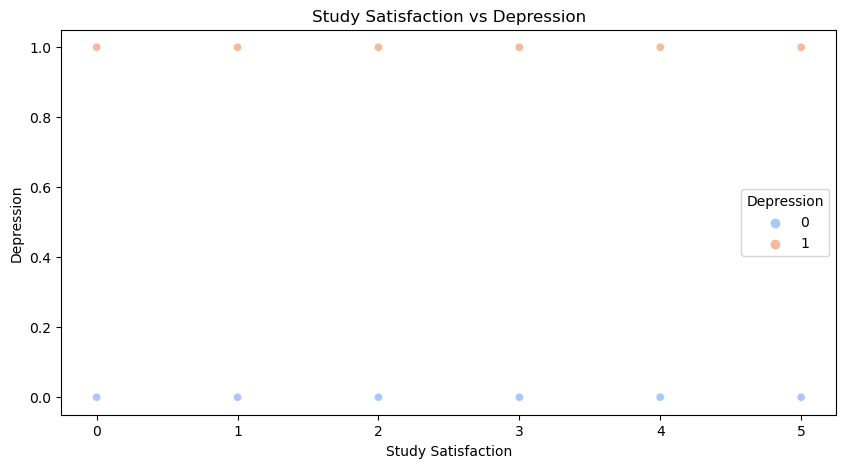

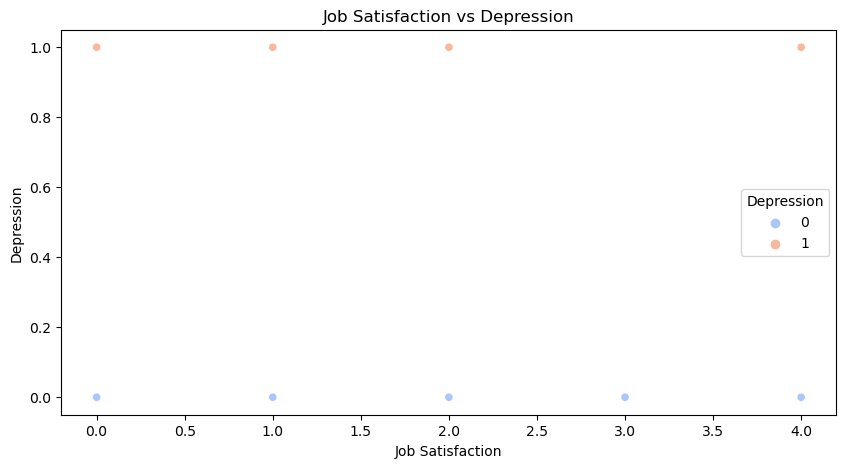

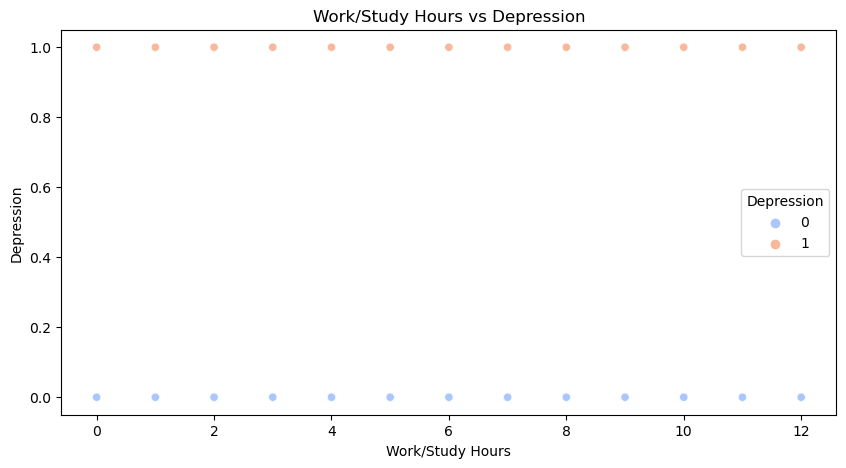

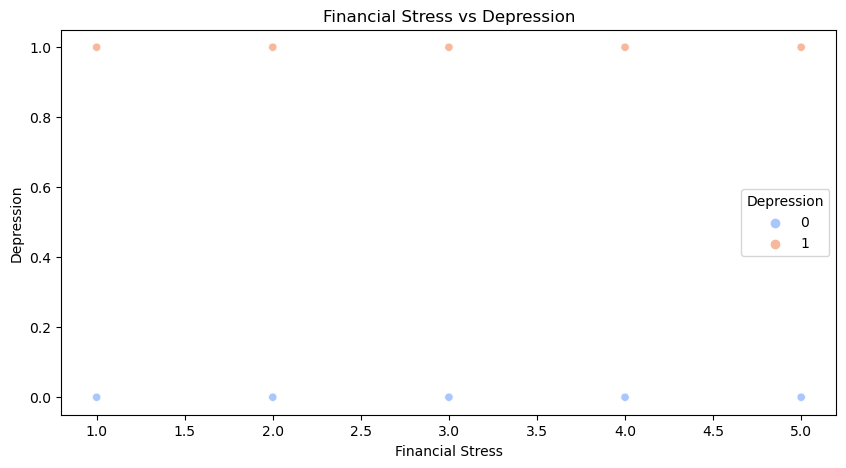

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Student Depression Dataset.csv")
df = df.drop(columns=['id'])

# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
df['Profession'] = df['Profession'].map({'Student': 0, 'Civil Engineer': 1, 'Architect': 2})

# Convert other categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['City', 'Sleep Duration', 'Dietary Habits', 'Degree'])

# Basic data exploration
print("First 10 rows of the dataset:")
print(df.head(10))

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

# Visualizations
# Heatmap of the correlation between features
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Histograms of numerical features
df.hist(bins=30, figsize=(20, 15), layout=(5, 4))
plt.tight_layout()
plt.show()

# Bar charts for categorical features
categorical_features = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Profession']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='Depression')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Scatter plots to explore relationships between numerical features and depression
numerical_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                      'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=feature, y='Depression', hue='Depression', palette='coolwarm')
    plt.title(f'{feature} vs Depression')
    plt.show()

In [ ]:
# жұмысына сәттілік